Import

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

Load Data

In [3]:

from sklearn.preprocessing import StandardScaler

def extract_features(x):
    x=x.loc[:,['verified','statuses','location','date_joined','most_recent_post','following','followers','likes','lists','tweet_language','tweets_this_week','retweet_ratio','retweeted_count','URL works','userNameScore','avg_tweets_by_hour_of_day','avg_tweets_by_day_of_week']]
    return x

data = pd.read_csv('./Data/featuresfloatv2.csv')
data=data.loc[:,['verified','statuses','location','date_joined','most_recent_post','following','followers','likes','lists','tweet_language','tweets_this_week','retweet_ratio','retweeted_count','URL works','userNameScore','avg_tweets_by_hour_of_day','avg_tweets_by_day_of_week','fake_follower','account_type']]

# Create an instance of StandardScaler
scaler = StandardScaler()
x=extract_features(data)
# Fit the scaler to your data
scaler.fit(x)

# Transform your data using the scaler
X_scaled = scaler.transform(x)

y = data.account_type.values.tolist()

In [4]:





x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=48)

Train the Gradient Boosting model

In [5]:
pipe = Pipeline([('gradientBoost', GradientBoostingClassifier())])
pipe.fit(x_train,y_train)

y_pred_train = pipe.predict(x_train)
y_pred_test = pipe.predict(x_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))


Training Accuracy score: 0.8837158068661649
Testing Accuracy score: 0.8795711558231752


Calculate the accuracy of the model

In [15]:
def accurracy(y_true,y_pred_test):
    return np.sum(y_true==y_pred_test)/len(y_true)
print('Accuracy  classification :',accurracy(y_test,y_pred_test))


Accuracy  classification : 0.8592414529914529


Calculate the classification report of the model

In [16]:
print("classification_report \n "+classification_report(y_test, y_pred_test))

classification_report 
               precision    recall  f1-score   support

         bot       0.85      0.71      0.77      2537
       human       0.86      0.94      0.90      4951

    accuracy                           0.86      7488
   macro avg       0.86      0.82      0.84      7488
weighted avg       0.86      0.86      0.86      7488



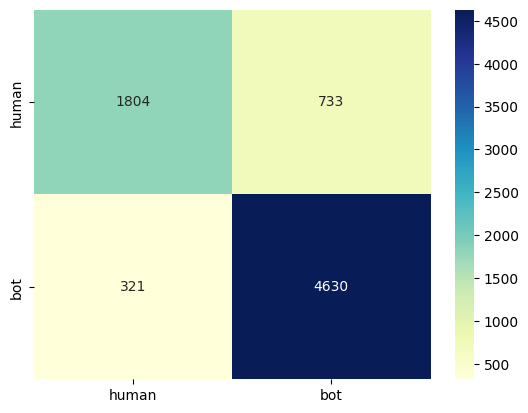

In [17]:
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm, columns=[ 'human', 'bot'], 
                        index=[ 'human', 'bot'])
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
